This lab on PCS and PLS in R comes from p. 256-259 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

# 6.7.1 Principal Components Regression

Principal components regression (PCR) can be performed using the ${\tt pcr()}$
function, which is part of the ${\tt pls}$ library. In this lab, we'll apply PCR to the ${\tt Hitters}$
data, in order to predict ${\tt Salary}$. As in previous labs, we'll start by ensuring that the missing values have
been removed from the data:

In [2]:
library(ISLR)
library(pls)
Hitters = na.omit(Hitters) # Omit empty rows


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



The syntax for the ${\tt pcr()}$ function is similar to that for ${\tt lm()}$, with a few
additional options. Setting ${\tt scale=TRUE}$ has the effect of standardizing each
predictor prior to generating the principal components, so that
the scale on which each variable is measured will not have an effect. Setting
${\tt validation="CV"}$ causes ${\tt pcr()}$ to compute the ten-fold cross-validation error
for each possible value of $M$, the number of principal components used.  As usual, we'll set a random seed for consistency:

In [3]:
set.seed(2)
pcr.fit = pcr(Salary~., data = Hitters, scale = TRUE, validation = "CV")

The resulting fit can be examined using the ${\tt summary()}$ function:

In [4]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    351.8    351.7    350.2    346.1    342.9
adjCV          452    351.5    351.4    351.2    349.7    345.4    342.1
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       343.6    345.3    347.4     350.0     351.6     353.0     357.4
adjCV    342.9    344.4    346.4     348.8     350.3     351.5     355.8
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        347.6     349.5     339.7     340.4     340.6     345.5
adjCV     345.8     347.8     338.0     338.6     338.6     343.2

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The CV score is provided for each possible number of components, ranging
from $M = 0$ onwards. Note that ${\tt pcr()}$ reports the **root mean squared error**; in order to obtain
the usual MSE, we must square this quantity. For instance, a root mean
squared error of 352.8 corresponds to an MSE of 352.82 = 124,468.

One can also plot the cross-validation scores using the ${\tt validationplot()}$
function. Using ${\tt val.type="MSEP"}$ will cause the cross-validation MSE to be
plotted:

ERROR: Error in file(con, "rb"): cannot open the connection


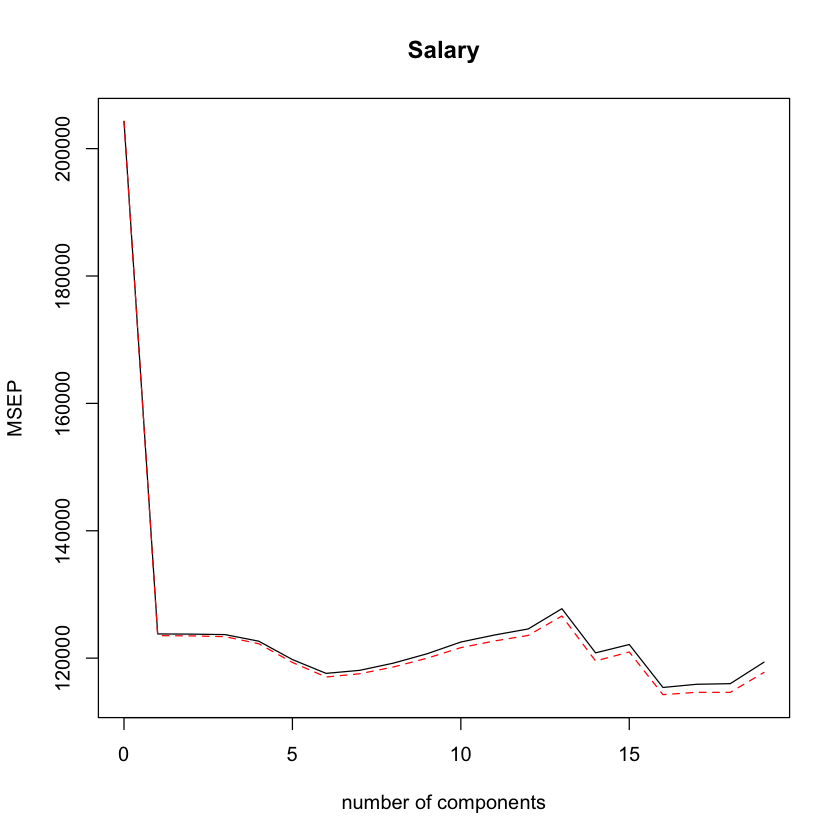

In [6]:
validationplot(pcr.fit, val.type = "MSEP")

We see that the smallest cross-validation error occurs when $M = 16$ components
are used. This is barely fewer than $M = 19$, which amounts to
simply performing least squares, because when all of the components are
used in PCR no dimension reduction occurs. However, from the plot we
also see that the cross-validation error is roughly the same when only one
component is included in the model. This suggests that a model that uses
just a small number of components might suffice.

You might have noticed that the ${\tt summary()}$ function also provides the percentage of variance explained
in the predictors and in the response using different numbers of components.
We'll dig deeper into this concept in Chapter 10, but for now we can think of this as the amount of information about the predictors or the response that is captured using $M$ principal components. For example,
setting $M = 1$ only captures 38.31% of all the variance, or information, in
the predictors. In contrast, using $M = 6$ increases the value to 88.63%. If
we were to use all $M = p = 19$ components, this would increase to 100%.

Now let's perform PCR on the training data and evaluate its test set
performance:

ERROR: Error in file(con, "rb"): cannot open the connection


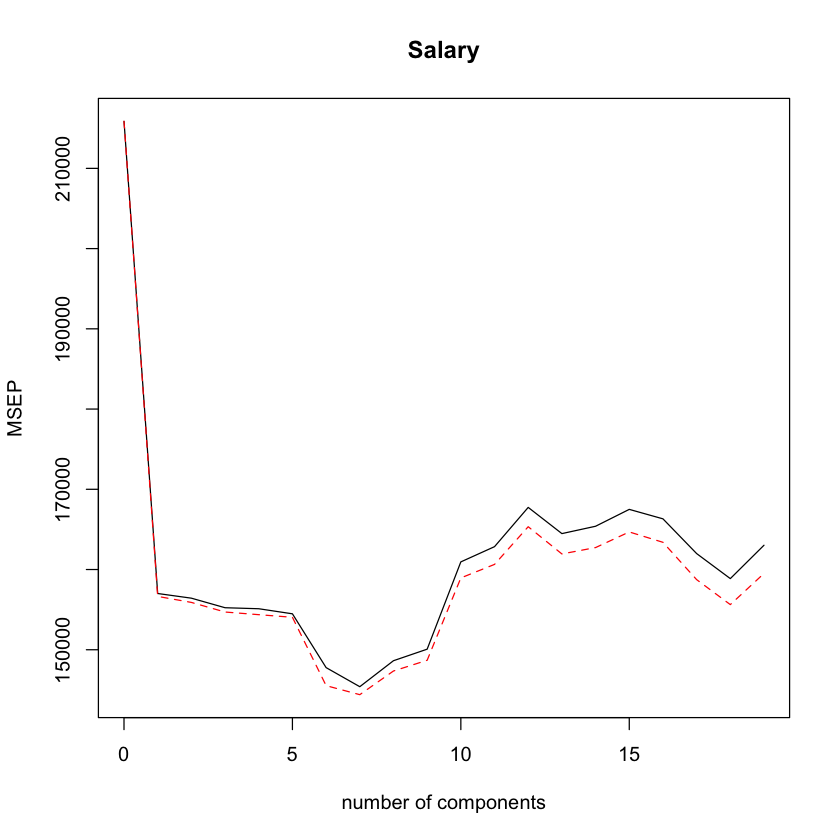

In [18]:
set.seed(1)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)

pcr.fit = pcr(Salary~., data = Hitters, subset = train, scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

We find that the lowest cross-validation error occurs when $M = 7$
components are used. We compute the test MSE as follows:

In [19]:
x = model.matrix(Salary~.,Hitters )[,-1]
y = Hitters$Salary

pcr.pred = predict(pcr.fit, x[test,], ncomp=7)
mean((pcr.pred-y[test])^2)

[1] 96556.22

This test set MSE is competitive with the results obtained using ridge regression
and the lasso. However, as a result of the way PCR is implemented,
the final model is more difficult to interpret because it does not perform
any kind of variable selection or even directly produce coefficient estimates.

Finally, we fit PCR on the full data set using $M = 7$, the number of
components identified by cross-validation:

In [20]:
pcr.fit = pcr(y~x, scale = TRUE, ncomp = 7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


# 6.7.2 Partial Least Squares

Next we'll implement partial least squares (PLS) using the ${\tt plsr()}$ function, also
in the ${\tt pls}$ library. The syntax is just like that of the ${\tt pcr()}$ function:

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

ERROR: Error in file(con, "rb"): cannot open the connection


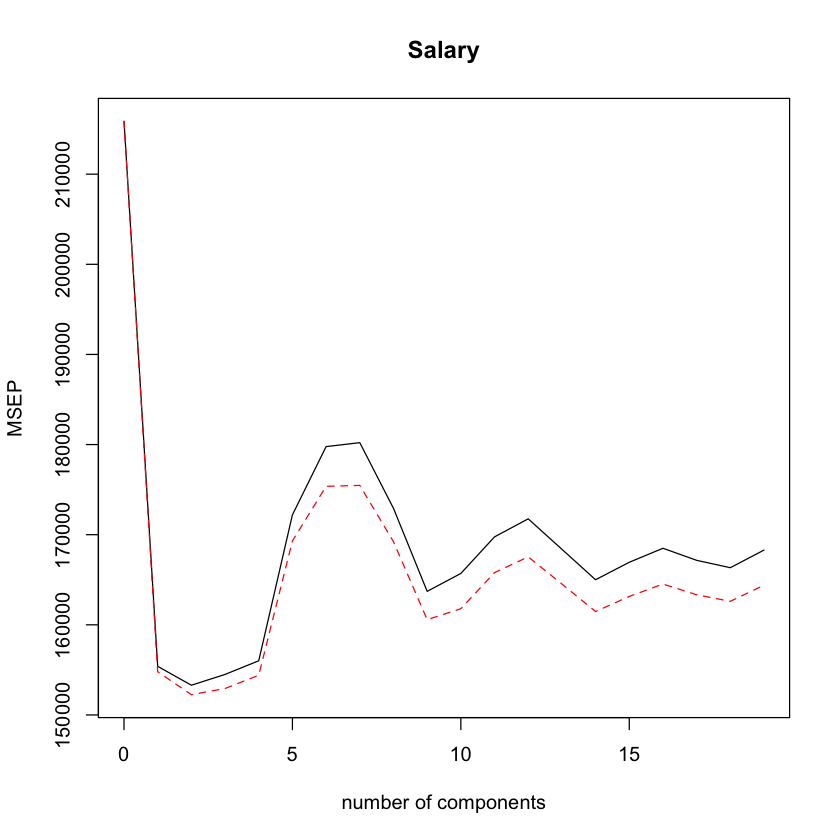

In [21]:
set.seed(1)
pls.fit=plsr(Salary~., data = Hitters, subset = train, scale = TRUE, validation = "CV")
summary(pls.fit)
validationplot(pls.fit, val.type = "MSEP")

The lowest cross-validation error occurs when only $M = 2$ partial least
squares directions are used. We now evaluate the corresponding test set
MSE:

In [24]:
pls.pred = predict(pls.fit, x[test,], ncomp = 2)
mean((pls.pred-y[test])^2)

[1] 101417.5

The test MSE is comparable to, but slightly higher than, the test MSE
obtained using ridge regression, the lasso, and PCR.

Finally, we perform PLS using the full data set using $M = 2$, the number
of components identified by cross-validation:

In [26]:
pls.fit = plsr(Salary~., data = Hitters, scale = TRUE, ncomp = 2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


To get credit for this lab, post your responses to the following questions:
 - What is the primary difference between PCR and PLS?
 - Which method do you think tends to have lower bias?
 - Which method do you think tends to have lower variance?
 
to Piazza: https://piazza.com/class/igwiv4w3ctb6rg?cid=42